In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## 1. Load the Data

### 1.1. Load the Data

In [14]:
df=pd.read_csv('../data/us_disaster_declarations.csv')

### 1.2. Inspect the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [4]:
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [5]:
df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000
mean,2577.105364,2004.339996,0.168087,0.268161,0.932035,0.431489,31705.675638,96373.283733,35025.917306
std,1405.535733,14.785293,0.373946,0.443006,0.251687,0.495288,16642.418797,13940.282164,34956.137681
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1316.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,19183.000000,99029.000000,8151.000000
50%,3057.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,30036.000000,99071.000000,20026.000000
75%,3546.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,46075.000000,99123.000000,74028.000000
max,5457.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


Dataset appears to be relatively clean, not many non-null values. There are many columns (24), several are likely unnecessary and can be cleaned up after EDA.

## 2. EDA

### 2.1. Explore the Data

In [15]:
# Examine the annual count of all disasters over the life of the time series

# Convert date to dtm and parse out year column
df['incident_dtm']=pd.to_datetime(df['incident_begin_date'], format='%Y-%m-%dT%H:%M:%SZ')
df['year']=pd.to_datetime(df['incident_dtm'], format='%Y').dt.year

# Add year and incident_type to new df
year_incident_df=df[['year', 'incident_type']]  

# Add counts column for each incident_type based on year
year_incident_df['counts']=year_incident_df.groupby(['year', 'incident_type'])['year'].transform('count')

year_incident_df.set_index('year')

year_incident_df.head()

/tmp/ipykernel_30531/2027866989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_incident_df['counts']=year_incident_df.groupby(['year', 'incident_type'])['year'].transform('count')


,year,incident_type,counts
0,1953,Tornado,6
1,1953,Tornado,6
2,1953,Flood,5
3,1953,Tornado,6
4,1953,Flood,5


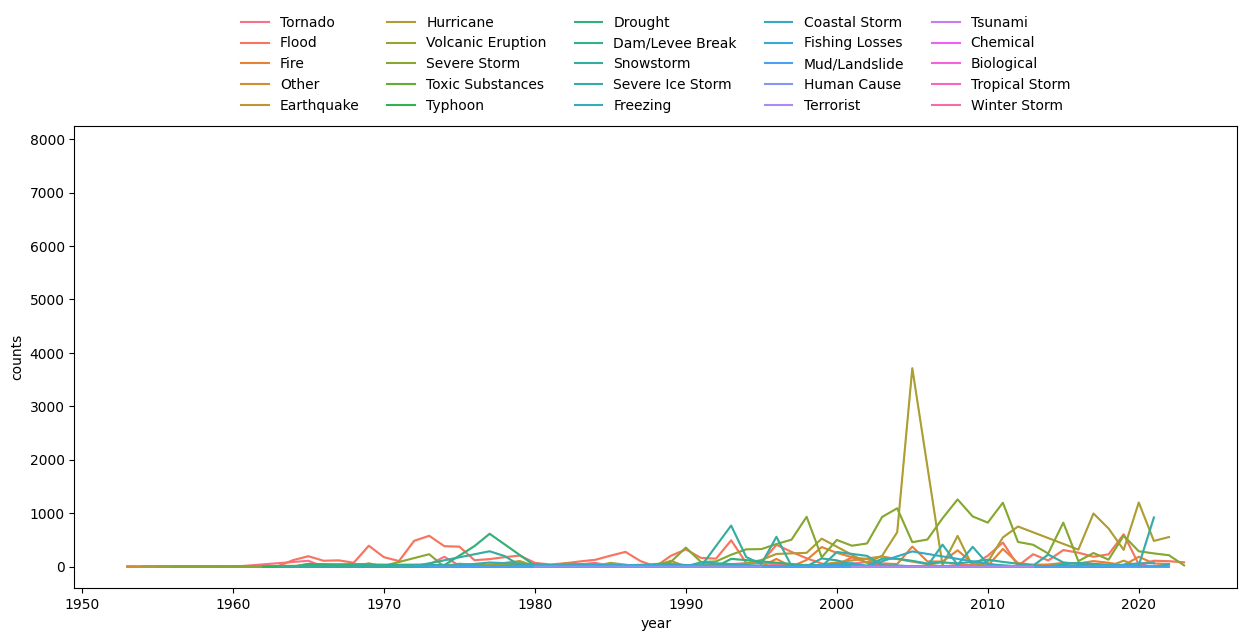

In [16]:
# Line plot: annual count of each disasters over the life of the time series

# Adjust plot size
plt.figure(figsize=(15, 6))

# Plot annual disaster counts
p=sns.lineplot(data=year_incident_df, x='year', y='counts', hue='incident_type')

# Adjust legend 
sns.move_legend(p, 'lower center', bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)


Hurricane and biological disasters each have a significant spike. Possibly due to COVID and Hurricane Katrina. These should be investigated further. 

/tmp/ipykernel_30531/3326517103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['counts']=year_incident_df.groupby(['year'])['year'].transform('count')
/tmp/ipykernel_30531/3326517103.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['year'], keep='last', inplace=True)
/tmp/ipykernel_30531/3326517103.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

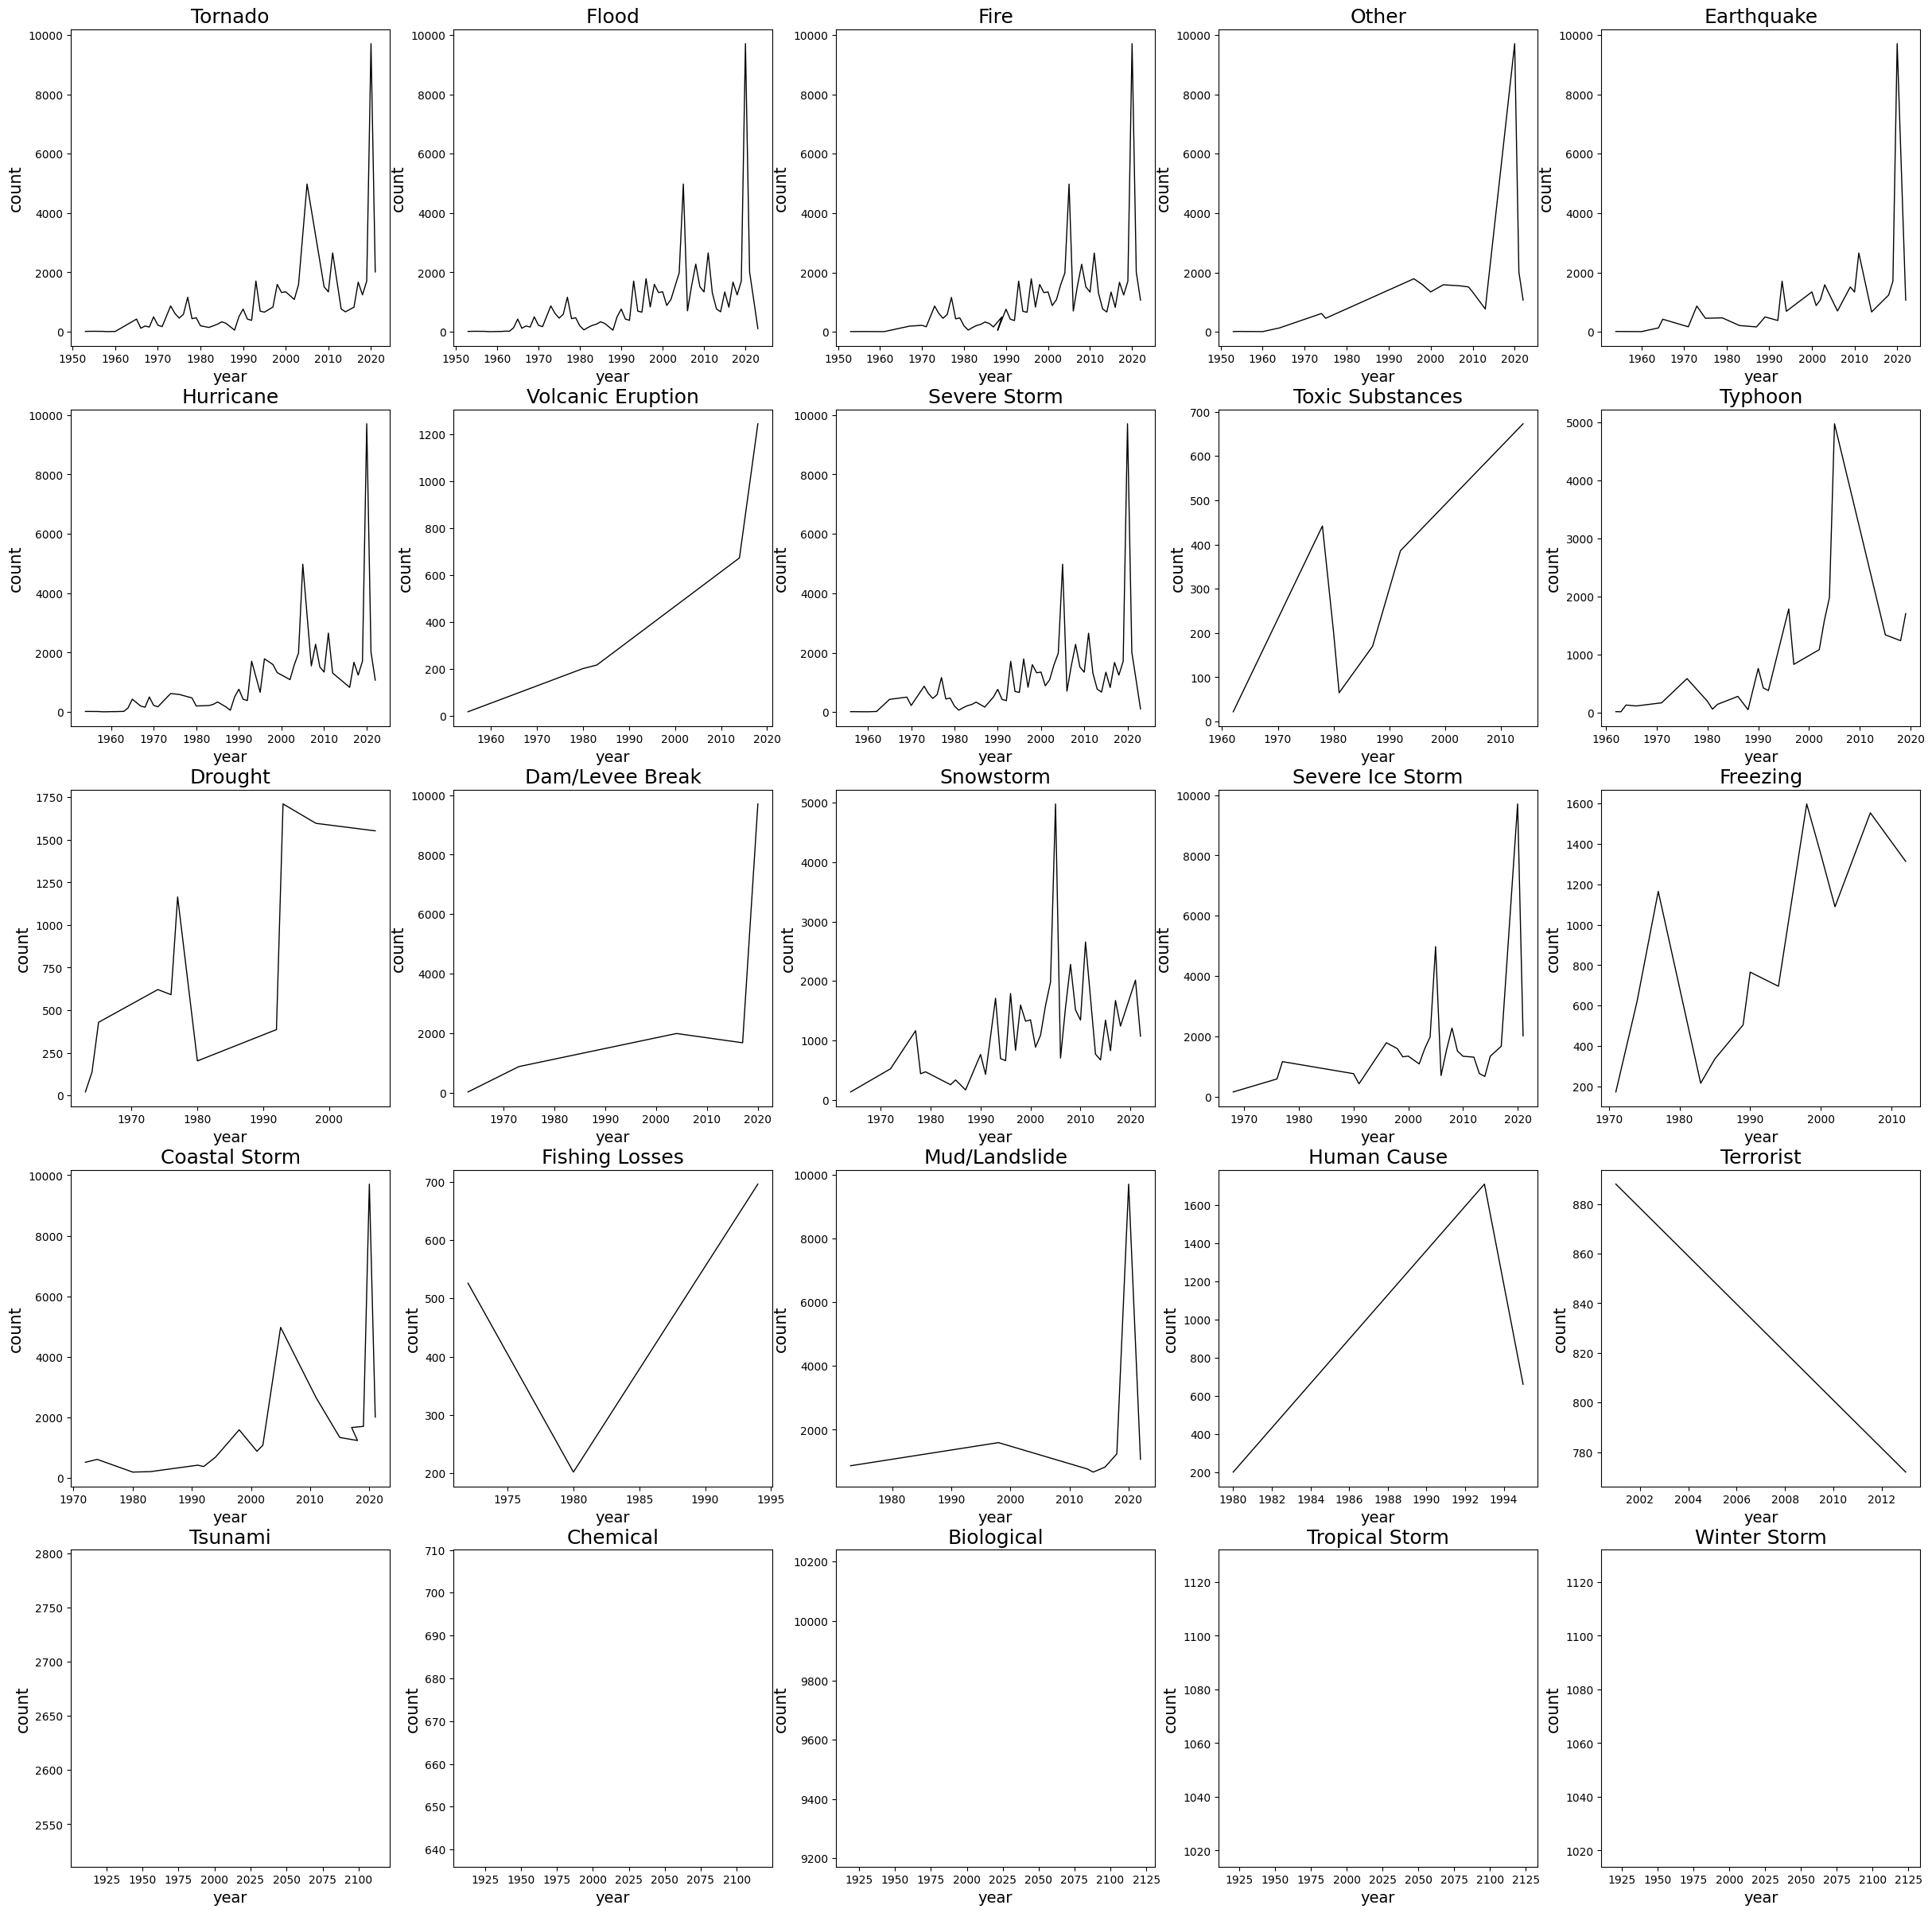

In [17]:
# Subplot annual count of each type of disaster individually

# Create array of unique incident_types
disaster_arr=df['incident_type'].unique()

fig, ax = plt.subplots(5, 5, figsize=(30, 30))

for i, disaster in enumerate(disaster_arr):
    # Create temp_df with 'year' and 'incident_type'
    temp_df=year_incident_df[['year', 'incident_type']]

    # Filter temp_df to only show d type of disaster
    temp_df=year_incident_df.loc[year_incident_df['incident_type']==disaster]

    # Count annual occurrences
    temp_df['counts']=year_incident_df.groupby(['year'])['year'].transform('count')

    # Drop duplicate years 
    temp_df.drop_duplicates(subset=['year'], keep='last', inplace=True)

    # Drop incident_type column
    temp_df.drop(['incident_type'], axis=1, inplace=True)

    ax = ax.flatten()

    ax[i].plot(temp_df['year'], temp_df['counts'], color='black', linewidth=1)
    ax[i].set_title(disaster, fontsize=18)
    ax[i].set_xlabel('year', fontsize=14)
    ax[i].set_ylabel('count', fontsize=15)

plt.show()

Tsunami, chemical, and tropical storm disasters don't appear to have an incidents. These should be further investigated and can likely be removed if there are no instances. 

In [18]:
# Examine tsunami, chemical, and tropical storm

# Examine tsunami
tsunami_df=year_incident_df.loc[year_incident_df['incident_type']=='Tsunami']
tsunami_df.drop_duplicates(subset=['year'], keep='last', inplace=True)

# Examine chemical
chemical_df=year_incident_df.loc[year_incident_df['incident_type']=='Chemical']
chemical_df.drop_duplicates(subset=['year'], keep='last', inplace=True)

# Examine tropical storm
tropical_storm_df=year_incident_df.loc[year_incident_df['incident_type']=='Tropical Storm']
tropical_storm_df.drop_duplicates(subset=['year'], keep='last', inplace=True)

# Combine all 3 into a dataframe
frames=[tsunami_df, chemical_df, tropical_storm_df]
result_df=pd.concat(frames)

result_df

/tmp/ipykernel_30531/1961788063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsunami_df.drop_duplicates(subset=['year'], keep='last', inplace=True)
/tmp/ipykernel_30531/1961788063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chemical_df.drop_duplicates(subset=['year'], keep='last', inplace=True)
/tmp/ipykernel_30531/1961788063.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_storm_df.drop_duplicates(subset=['

,year,incident_type,counts
39444,2011,Tsunami,9
43706,2014,Chemical,9
63740,2022,Tropical Storm,54


All three disaster types do have reported incidents. 

In [19]:
# Examine which states are prone to which disaster types
state_type=df[['state','incident_type']].groupby('state').describe()
state_type['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,5173,11,Hurricane,1303
MO,2704,8,Severe Storm,1339
KY,2583,10,Severe Storm,999
VA,2524,11,Hurricane,877
LA,2493,11,Hurricane,1364
OK,2474,9,Severe Storm,1005
FL,2352,11,Hurricane,1219
GA,2278,10,Hurricane,905
NC,2096,10,Hurricane,1304


Hurricanes and severe storms are the most frequently reported disasters, occurring in various states.

In [20]:
# Examine frequency of disaster types
disaster_types=df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']
Occurrences:

 incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Tsunami                  9
Chemic

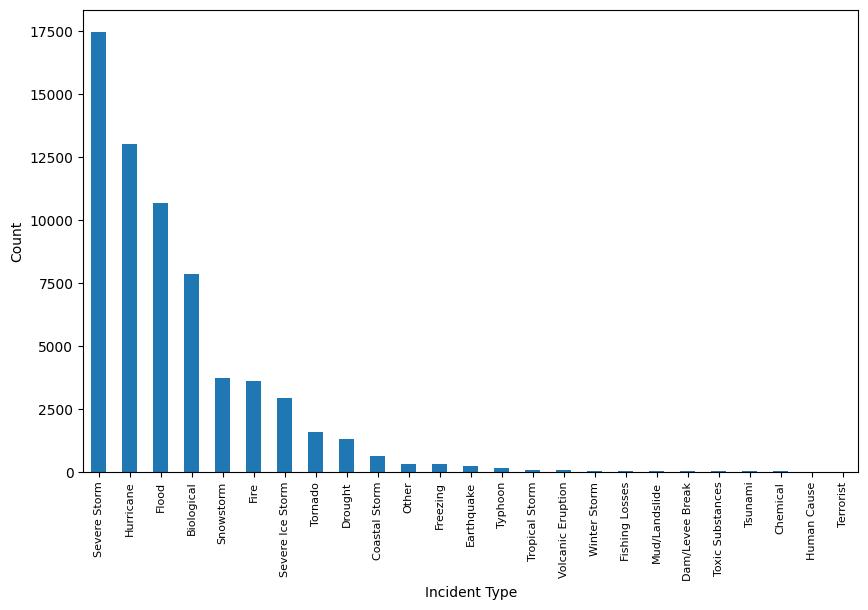

In [22]:
# Bar plot: total count of each type of disaster

# Extract the counts for each state
type_count=df['incident_type'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the bar plot
type_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Incident Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

Severe storms, hurricanes, and floods are the most common types of disaster reported, at over 10K occurrences each. Most other types are below 5K occurrences. Consider removing non-weather related disasters (biological, other, fishing losses, toxic substances, etc.)

In [23]:
# Examine locations of disasters (state level)
disaster_loc=df['state'].unique()
print("Location of Disasters reported:\n\n", disaster_loc)
print("Occurrences:\n\n",df['state'].value_counts())

Location of Disasters reported:

 ['GA' 'TX' 'LA' 'MI' 'MT' 'IA' 'MA' 'NH' 'FL' 'AK' 'MS' 'CA' 'NV' 'SD'
 'WV' 'RI' 'ME' 'CT' 'NY' 'NM' 'SC' 'NC' 'IN' 'HI' 'CO' 'KS' 'OK' 'NJ'
 'PA' 'OR' 'WA' 'ID' 'OH' 'PR' 'KY' 'VA' 'MO' 'AR' 'MN' 'ND' 'IL' 'NE'
 'AL' 'MD' 'DE' 'GU' 'TN' 'FM' 'WY' 'VT' 'VI' 'WI' 'AS' 'AZ' 'MP' 'UT'
 'MH' 'DC' 'PW']
Occurrences:

 state
TX    5173
MO    2704
KY    2583
VA    2524
LA    2493
OK    2474
FL    2352
GA    2278
NC    2096
PR    1987
MS    1906
IA    1848
KS    1759
AL    1665
TN    1605
CA    1599
AR    1593
MN    1563
NY    1503
NE    1485
IN    1451
SD    1430
ND    1359
IL    1283
OH    1281
PA    1239
WV    1232
ME    1019
WA     979
SC     947
WI     892
MI     796
CO     646
NJ     625
MT     605
OR     586
NM     514
MD     448
MA     398
ID     361
VT     338
AZ     335
AK     318
NH     301
NV     274
CT     255
UT     249
WY     128
RI     114
HI     100
VI      80
AS      76
MP      63
DE      53
MH      53
FM      31
DC      23
GU      19
PW    

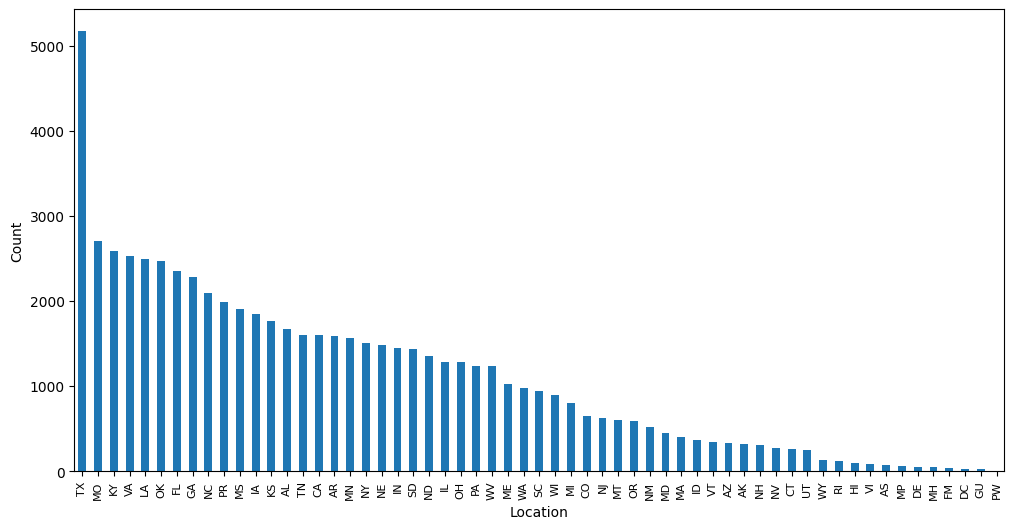

In [24]:
# Bar plot: total count of disaster occurrences at each location

# Extract the counts for each state
loc_count=df['state'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar plot
loc_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

TX reports a significantly higher number of disasters than any other location with over 5K occurrences. All other locations are below 3K occurrences. Consider removing non-states/territories.

In [25]:
# Examine the number of disasters annually
disaster_yr=df['year'].unique()
print("Year of Disaster report:\n\n", disaster_yr)
print("Occurrences:\n\n",df['year'].value_counts())

Year of Disaster report:

 [1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]
Occurrences:

 year
2020    9706
2005    4978
2011    2657
2008    2280
2021    2016
        ... 
1953      13
1961      12
1960      12
1959       7
1958       7
Name: count, Length: 71, dtype: int64


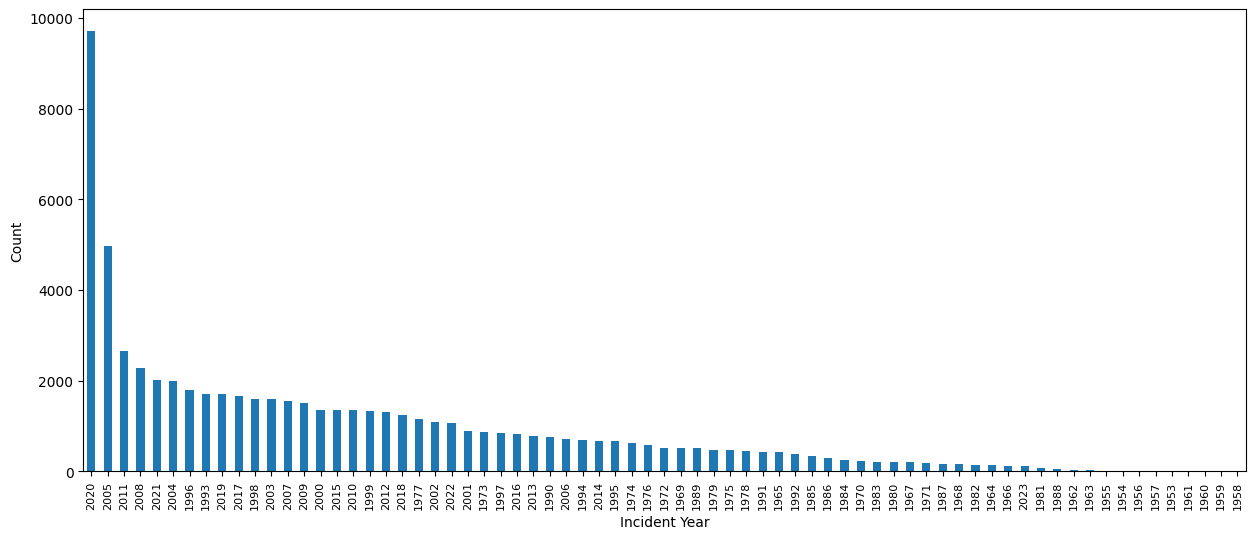

In [26]:
# Bar plot: total count of disaster occurrences each year

# Extract the counts for each state
yr_count=df['year'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plot the bar plot
yr_count.plot(kind='bar')

# Set title and labels
plt.xlabel('Incident Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

2020 and 2005 had very high numbers of disasters reported, just under 10K and just under 5K, respectively. All other years had under 3K disasters reported. 2020 is likely due to COVID and 2005 is likely due to Hurricane Katrina, but both years should be investigated more thoroughly. 

In [28]:
# Examine 2020

# Set year to 2020
yr_2020=df[df['incident_dtm'].dt.strftime('%Y')=='2020']

# Group by 'declaration_title' and count occurrences
yr_2020=yr_2020.groupby(['declaration_title', 'incident_type']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

yr_2020.head()

,declaration_title,incident_type,count
30,Covid-19 Pandemic,Biological,4165
29,Covid-19,Biological,3692
55,Hurricane Sally,Hurricane,198
48,Hurricane Delta,Hurricane,157
53,Hurricane Laura,Hurricane,144


This confirms that the high rate of disasters reported in 2020 were due to COVID. 7.5/10K disasters reported were COVID-related. This outlier will be mitigated if we focus on weather-related disasters. Biological disasters are not weather-related, they are more random and harder to predict.

In [29]:
# Examine 2005

# Set year to 2005
yr_2005=df[df['incident_dtm'].dt.strftime('%Y')=='2005']

# Group by 'declaration_title' and count occurrences
yr_2005=yr_2005.groupby(['declaration_title', 'incident_type']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)

yr_2005.head(10)

,declaration_title,incident_type,count
28,Hurricane Katrina Evacuation,Hurricane,2315
31,Hurricane Rita,Hurricane,637
26,Hurricane Katrina,Hurricane,490
18,Extreme Wildfire Threat,Fire,331
27,Hurricane Katrina Evacuation,Coastal Storm,287
25,Hurricane Dennis,Hurricane,108
47,Severe Storms And Flooding,Severe Storm,106
29,Hurricane Katrina Evacuees,Hurricane,93
57,Severe Winter Storms And Flooding,Severe Storm,87
55,Severe Winter Storm,Severe Storm,86


This confirms that the high rate of disasters reported in 2005 were due to Hurricane Katrina evacuations. 2.9/5K disasters reported were Katrina-related. Just under 1K additional disasters reported in 2005 were hurricane-related.

### 2.2. Feature Selection/Cleaning
- remove non-states/territories
- remove non-weather disasters (keep earthquakes, volcanic eruptions)
- combine severe ice storm, snowstorm, freezing, and winter storm into 'winter weather'
- update resampled_df with selected features
- clean up resampled_df (reset index, extract month and year, drop dtm)

In [38]:
# Remove non-weather disasters (include earthquakes, volcanic eruptions)
# Combine severe ice storm, snowstorm, freezing, and winter storm into 'winter weather'

# Drop some disaster types - focus on weather-related disasters (include wildfires, earthquakes, and volcanic eruptions)
disaster_drops=['Biological', 'Chemical', 'Fishing Losses', 'Human Cause', 'Other', 'Terrorist', 'Toxic Substances']
resampled_df.drop(disaster_drops, axis=1, inplace=True)

# Combine winter-related weather disasters
resampled_df['Winter weather']=resampled_df['Severe Ice Storm'] + resampled_df['Snowstorm'] + resampled_df['Freezing'] + resampled_df['Winter Storm']
resampled_df.drop(['Severe Ice Storm','Snowstorm','Freezing','Winter Storm'], axis=1, inplace=True)
resampled_df.head()

declaration_dtm  Coastal Storm  Dam/Levee Break  Drought  Earthquake  \
state                                                                          
AK    0      1953-10-31          False            False    False       False   
      1      1953-11-01          False            False    False       False   
      2      1953-11-02          False            False    False       False   
      3      1953-11-03          False            False    False       False   
      4      1953-11-04          False            False    False       False   

          Fire  Flood  Hurricane  Mud/Landslide  Severe Storm  Tornado  \
state                                                                    
AK    0  False  False      False          False         False    False   
      1  False  False      False          False         False    False   
      2  False  False      False          False         False    False   
      3  False  False      False          False         False    False   
      4  False  False      False          False         False    False   

         Tropical Storm  Tsunami  Typhoon  Volcanic Eruption  Winter weather  
state                                                                         
AK    0           False    False    False              False           False  
      1           False    False    False              False           False  
      2           False    False    False              False           False  
      3           False    False    False              False           False  
      4           False    False    False              False           False

In [39]:
# Clean up the index
resampled_df.reset_index(inplace=True)
resampled_df.drop('level_1', axis=1, inplace=True)

In [40]:
# Extract month and year from 'declaration_dtm' and drop dtm column
resampled_df['year']=resampled_df['declaration_dtm'].dt.year
resampled_df['month']=resampled_df['declaration_dtm'].dt.month
resampled_df.drop('declaration_dtm', axis=1, inplace=True)
resampled_df.head()

,state,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Flood,Hurricane,Mud/Landslide,Severe Storm,Tornado,Tropical Storm,Tsunami,Typhoon,Volcanic Eruption,Winter weather,year,month
0,AK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1953,10
1,AK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1953,11
2,AK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1953,11
3,AK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1953,11
4,AK,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1953,11
